# yury belyakov

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
df['year'] = df['Day'].apply(lambda x: x.year)
df.groupby(['year']).mean().idxmin()

t    2012
dtype: int64

In [5]:
df.groupby(['year']).mean().idxmax()

t    2015
dtype: int64

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [6]:
df['jan_and_positive'] = df['Day'].apply(lambda x: x.month==1) * df['t'] > 0

In [7]:
df.groupby(["jan_and_positive", "year"])['t'].sum()[1].idxmax()

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [8]:
df['is_summer'] = df['Day'].apply(lambda x: x.month in [6,7,8])

In [9]:
df.groupby(['is_summer','year'])['t'].mean()[1].idxmin()

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [10]:
df['Day'][(df['t'] - df['t'].shift(-1)).abs().idxmax()]

Timestamp('2014-05-26 00:00:00')

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

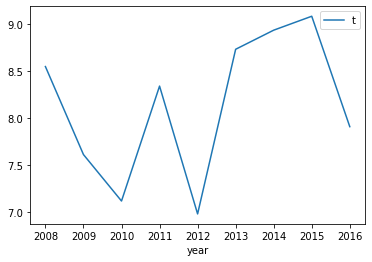

In [11]:
%matplotlib inline

df[['year', 't']].groupby(['year']).mean().plot()